In [1]:
# Spark init
!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
!pip install -q findspark
import findspark
findspark.init()
from google.colab import drive
drive.mount('/content/drive')
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .config('spark.sql.execution.arrow.pyspark.enabled', True) \
        .config('spark.sql.session.timeZone', 'UTC') \
        .config('spark.driver.memory','1T') \
        .config('spark.ui.showConsoleProgress', True) \
        .config('spark.sql.repl.eagerEval.enabled', True) \
        .appName("pyspark-geopandas")\
        .getOrCreate()


Mounted at /content/drive


In [2]:
import pandas as pd
!pip install geopandas
from geopandas import GeoDataFrame # Loading boundaries Data
from shapely.geometry import Point, Polygon, shape # creating geospatial data
from shapely import wkb, wkt # creating and parsing geospatial data
from ast import literal_eval as make_tuple # used to decode data from java



     |████████████████████████████████| 1.0 MB 6.9 MB/s 
     |████████████████████████████████| 16.7 MB 303 kB/s 
     |████████████████████████████████| 6.3 MB 37.5 MB/s 


In [ ]:
!unzip /content/drive/MyDrive/data/data.zip -d /content/drive/MyDrive/data/imbd
!pip install --upgrade --no-cache-dir gdown


Archive:  /content/drive/MyDrive/data/data.zip
  inflating: /content/drive/MyDrive/data/imbd/name.basics.tsv.gz  
  inflating: /content/drive/MyDrive/data/imbd/name.basics.tsv/name.basics.tsv  
  inflating: /content/drive/MyDrive/data/imbd/title.akas.tsv.gz  
  inflating: /content/drive/MyDrive/data/imbd/title.akas.tsv/title.akas.tsv  
  inflating: /content/drive/MyDrive/data/imbd/title.basics.tsv.gz  
  inflating: /content/drive/MyDrive/data/imbd/title.basics.tsv/title.basics.tsv  
  inflating: /content/drive/MyDrive/data/imbd/title.principals.tsv.gz  
  inflating: /content/drive/MyDrive/data/imbd/title.principals.tsv/title.principals.tsv  
  inflating: /content/drive/MyDrive/data/imbd/title.ratings.tsv.gz  
  inflating: /content/drive/MyDrive/data/imbd/title.ratings.tsv/title.ratings.tsv  


In [ ]:
!gdown --id 1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR -O /content/drive/MyDrive/data/name.basics.tsv.gz
!gunzip /content/drive/MyDrive/data/name.basics.tsv.gz
!gdown --id 1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR -O /content/drive/MyDrive/data/title.akas.tsv.gz
!gunzip /content/drive/MyDrive/data/title.akas.tsv.gz
!gdown --id 1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR -O /content/drive/MyDrive/data/title.basics.tsv.gz
!gunzip /content/drive/MyDrive/data/title.basics.tsv.gz
!gdown --id 1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR -O /content/drive/MyDrive/data/title.principals.tsv.gz
!gunzip /content/drive/MyDrive/data/title.principals.tsv.gz
!gdown --id 1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR -O /content/drive/MyDrive/data/title.ratings.tsv.gz
!gunzip /content/drive/MyDrive/data/title.ratings.tsv.gz


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR 

gzip: /content/drive/MyDrive/data/name.basics.tsv.gz: No such file or directory
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1908GDMdrhDN7sTaI_FelSHxbwcNM1EzR
To: /content/drive/MyDrive/data/title.akas.tsv.gz
100% 172M/172M [00:01<00

In [3]:
df_names = spark.read.option("header","true")\
                     .option("sep", "\t")\
                     .option("multiLine", "true")\
                     .option("quote","\"")\
                    .option("escape","\"")\
                    .option("ignoreTrailingWhiteSpace", True)\
                    .csv("/content/drive/MyDrive/data/name.basics.tsv")


In [4]:
df_basics = spark.read.option("header","true")\
                     .option("sep", "\t")\
                     .option("multiLine", "true")\
                     .option("quote","\"")\
                    .option("escape","\"")\
                    .option("ignoreTrailingWhiteSpace", True)\
                    .csv("/content/drive/MyDrive/data/title.basics.tsv")


In [5]:
df_ratings = spark.read.option("header","true")\
                     .option("sep", "\t")\
                     .option("multiLine", "true")\
                     .option("quote","\"")\
                    .option("escape","\"")\
                    .option("ignoreTrailingWhiteSpace", True)\
                    .csv("/content/drive/MyDrive/data/title.ratings.tsv")


In [6]:
df_akas = spark.read.option("header","true")\
                     .option("sep", "\t")\
                     .option("multiLine", "true")\
                     .option("quote","\"")\
                    .option("escape","\"")\
                    .option("ignoreTrailingWhiteSpace", True)\
                    .csv("/content/drive/MyDrive/data/title.akas.tsv")


In [7]:
df_principals = spark.read.option("header","true")\
                     .option("sep", "\t")\
                     .option("multiLine", "true")\
                     .option("quote","\"")\
                    .option("escape","\"")\
                    .option("ignoreTrailingWhiteSpace", True)\
                    .csv("/content/drive/MyDrive/data/title.principals.tsv")


In [8]:
df_names.show(10)

+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419,tt00531...|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0071877,tt01170...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,soun...|tt0077975,tt00725...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0069467,tt00509...|
|nm0000006| Ingrid Bergman|     1915|     1982|actress,soundtrac...|tt0038109,tt00368...|
|nm0000007|Humphrey Bogart|     1899|     1957|actor,soundtrack,...|tt0043265,tt00338...|
|nm0000008|  Marlon Brando|     1924|     2004|actor,soundtrack,...|tt0070849,tt00787...|
|nm0000009

In [9]:
df_ratings.show(10)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1207|
|tt0000004|          6.2|     113|
|tt0000005|          6.1|    1934|
|tt0000006|          5.2|     102|
|tt0000007|          5.5|     615|
|tt0000008|          5.4|    1667|
|tt0000009|          5.4|      81|
|tt0000010|          6.9|    5545|
+---------+-------------+--------+
only showing top 10 rows



In [10]:
df_akas.show(10)

+---------+--------+--------------------+------+--------+-----------+----------+---------------+
|  titleId|ordering|               title|region|language|      types|attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+----------+---------------+
|tt0000001|       1|Carmencita - span...|    HU|      \N|imdbDisplay|        \N|              0|
|tt0000001|       2|          Καρμενσίτα|    GR|      \N|         \N|        \N|              0|
|tt0000001|       3|          Карменсита|    RU|      \N|         \N|        \N|              0|
|tt0000001|       4|          Carmencita|    US|      \N|         \N|        \N|              0|
|tt0000001|       5|          Carmencita|    \N|      \N|   original|        \N|              1|
|tt0000002|       1|Le clown et ses c...|    \N|      \N|   original|        \N|              1|
|tt0000002|       2|   A bohóc és kutyái|    HU|      \N|imdbDisplay|        \N|              0|
|tt0000002|       3|Le clown e

In [11]:
df_basics.show(10)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            \N|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [12]:
df_principals.show(10)

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

In [13]:
df_rating_movie = df_basics.join(df_ratings,["tconst"],"inner") 
df_rating_movie.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+-------------+--------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|         genres|averageRating|numVotes|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+-------------+--------+
|tt0000658|    short|The Puppet's Nigh...|Le cauchemar de F...|      0|     1908|     \N|             2|Animation,Short|          6.4|     150|
|tt0001732|    short|The Lighthouse Ke...|The Lighthouse Ke...|      0|     1911|     \N|            \N|    Drama,Short|          7.1|       8|
|tt0002253|    short|          Home Folks|          Home Folks|      0|     1912|     \N|            17|    Drama,Short|          4.2|       5|
|tt0002473|    short|    The Sands of Dee|    The Sands of Dee|      0|     1912|     \N|            17|  Romance,Short|          6.7|  

In [14]:
import pyspark.sql.types as func
# Convert String to Integer Type
df_rating_movie = df_rating_movie.withColumn("averageRating",df_rating_movie.averageRating.cast(func.IntegerType()))
df_rating_movie = df_rating_movie.withColumn("numVotes",df_rating_movie.numVotes.cast('int'))


In [15]:
import pyspark.sql.functions as func
df_rating_movie = df_rating_movie.withColumn('genres', func.split(df_rating_movie['genres'], ','))

In [16]:
df_rating_pandas = df_rating_movie.toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bda447e10>]],
      dtype=object)

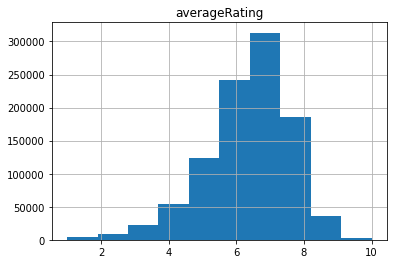

In [17]:
df_rating_pandas.hist("averageRating")
#the histogram shows the ratings and how they are distributed

In [44]:
df_rating_pandas.dropna(inplace=True)
genre_dict = {}

for i in df_rating_pandas["genres"]:
    for j in i:
        if j not in genre_dict:
            genre_dict[j] = 1
        else:
            genre_dict[j] += 1

Text(0.5, 1.0, 'Movie Genres')

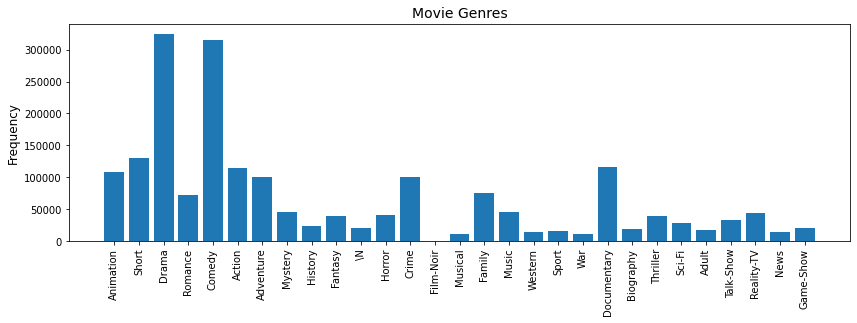

In [25]:

df_genre = pd.Series(genre_dict)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(df_genre.index,
        df_genre.values)
plt.xticks(rotation = 90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Movie Genres", size = 14)


In [27]:
 df_year = df_rating_pandas.groupby("startYear")["averageRating"].mean()

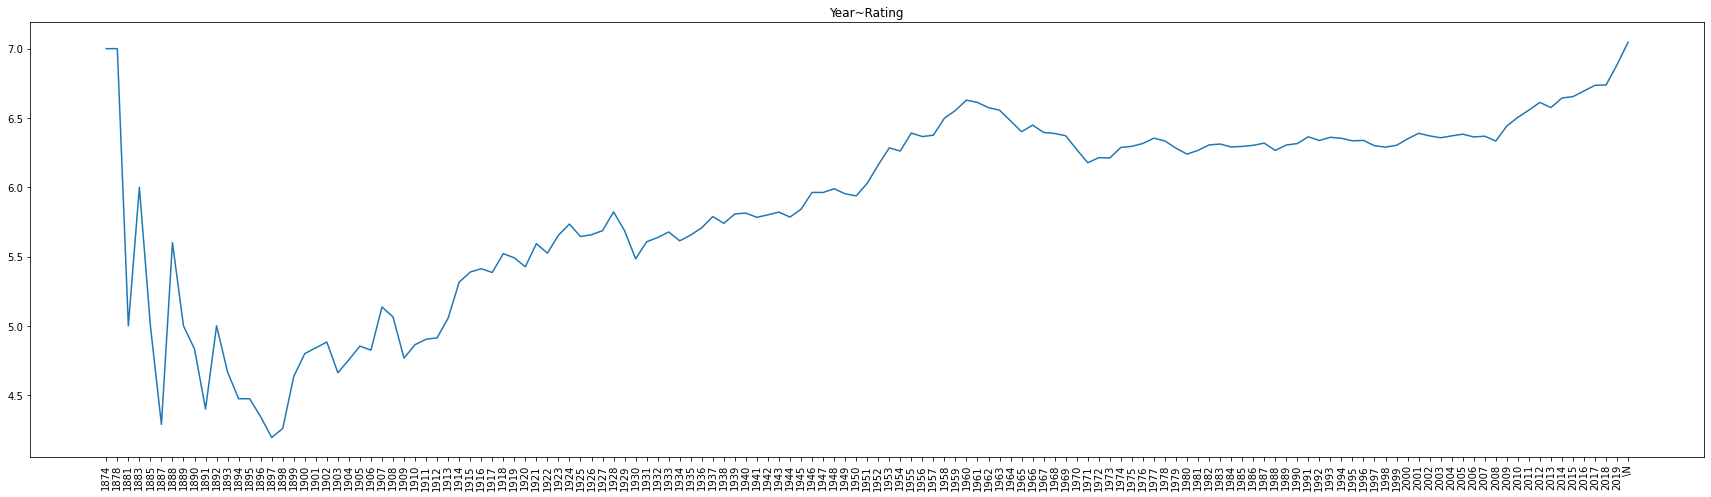

In [35]:
fig, ax = plt.subplots(figsize = (30,8))
ax.plot(df_year)
plt.title('Year~Rating')
plt.xticks(rotation = 90)
plt.show()